In [159]:
#importing nessecary libraries
import numpy as np              #used to work numerical data
import pandas as pd             #used to manipluation of data
import matplotlib.pyplot as plt #used to visualize the data

In [160]:
#loading the data from dataset
df = pd.read_csv('./Google_Stock_Price_Train.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [161]:
#display the detail of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [162]:
#converted Close, Volume columns and Data into their appropriate type
df['Close'] = [float(x.replace(',','')) for x in df['Close']]
df['Volume'] = [float(x.replace(',','')) for x in df['Volume']]
df['Date'] = pd.to_datetime(df['Date'])

In [163]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [164]:
#preprocess the data for optimize training and accurate model training
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
columns_to_scale = ['Open', 'High', 'Low', 'Volume']
original_data = df.copy()
df[columns_to_scale] = ss.fit_transform(df[columns_to_scale])

In [165]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,-1.372855,-1.340653,-1.355794,663.59,1.857776
1,2012-01-04,-1.333209,-1.333854,-1.328483,666.45,1.140122
2,2012-01-05,-1.342692,-1.354253,-1.343036,657.21,1.510102
3,2012-01-06,-1.352505,-1.367198,-1.364366,648.24,0.988988
4,2012-01-09,-1.393995,-1.409566,-1.458855,620.76,3.753349


In [166]:
#reverse process to actual data
original_data[columns_to_scale] = ss.inverse_transform(df[columns_to_scale])

In [167]:
original_data

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,623400.0
1254,2016-12-27,790.68,797.86,787.66,791.55,789100.0
1255,2016-12-28,793.70,794.23,783.20,785.05,1153800.0
1256,2016-12-29,783.33,785.93,778.92,782.79,744300.0


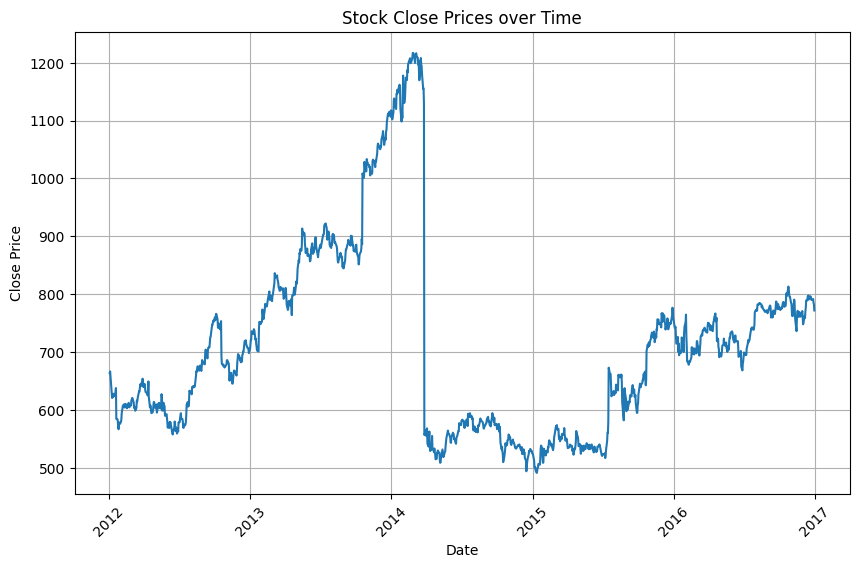

In [168]:
# Plotting the graph
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.plot(original_data['Date'], original_data['Close'])  # Plotting Date on x-axis and Close on y-axis
plt.title('Stock Close Prices over Time')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Close Price')  # Set the label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines to the plot
plt.show()  # Display the plot

In [169]:
from sklearn.linear_model import LinearRegression

# Extract relevant information from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Separate the features and target variable
X = df[['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Create an instance of the LinearRegression model
model = LinearRegression()

# Train the model on the training data
model.fit(X, y)

LinearRegression()

In [170]:
test_data = pd.read_csv('./Google_Stock_Price_Test.csv')

#converted Close, Volume columns and Data into their appropriate type
test_data['Volume'] = [float(x.replace(',','')) for x in test_data['Volume']]
test_data['Date'] = pd.to_datetime(test_data['Date'])

#preprocess the data for optimize training and accurate model training
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
columns_to_scale = ['Open', 'High', 'Low', 'Volume']
test_data[columns_to_scale] = ss.fit_transform(test_data[columns_to_scale])

# Extract relevant information from the 'Date' column
test_data['Year'] = test_data['Date'].dt.year
test_data['Month'] =test_data['Date'].dt.month
test_data['Day'] =test_data['Date'].dt.day

# Separate the features and target variable
X = test_data[['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]
y = test_data['Close']

predict_y = model.predict(X)

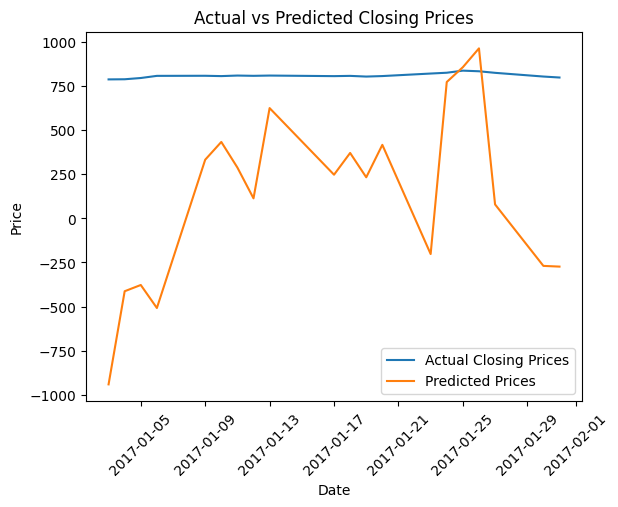

In [171]:
# Plotting the actual closing prices
plt.plot(test_data['Date'], y, label='Actual Closing Prices')

# Plotting the predicted prices
plt.plot(test_data['Date'], predict_y, label='Predicted Prices')

# Adding labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.show()
